In [3]:
import os
import pandas as pd
import face_recognition
import matplotlib.pyplot as plt
import cv2
import numpy as np

ruta_carpeta_inicial = '/home/waldos/Documents/2doCodigo/TopicoIA/BD/FER'
#ruta_carpeta_inicial = '/home/waldos/Documents/2doCodigo/TopicoIA/BD/FERPrueba'

Primero inspeccionamos la carpeta y todas las fotos le extraemos las caracteristicas del rostro. Las asignamos en 4 categorias

In [4]:
#Crear lista para almacenar datos de imagenes
directorio = []

for nombre_carpeta in os.listdir(ruta_carpeta_inicial):
    ruta_carpeta = os.path.join(ruta_carpeta_inicial, nombre_carpeta)
    if os.path.isdir(ruta_carpeta):
        for nombre_archivo in os.listdir(ruta_carpeta):
            try:
                ruta_archivo = os.path.join(ruta_carpeta, nombre_archivo)
                imagen_BGR = cv2.imread(ruta_archivo)

                imagen_Gray = cv2.cvtColor(imagen_BGR, cv2.COLOR_BGR2GRAY)

                #imagen_redimensionada = cv2.resize(imagen_Gray,(150,150))
                imagen_redimensionada = imagen_BGR

                caracteristicas_faciales = face_recognition.face_landmarks(imagen_redimensionada)
                
                arriba,derecha,abajo,izquierda = face_recognition.face_locations(imagen_redimensionada)[0]

                cara_recortada = imagen_redimensionada[arriba:abajo, izquierda:derecha]
                directorio.append([imagen_redimensionada, caracteristicas_faciales[0], cara_recortada, nombre_carpeta])
            except Exception as e:
                print("Error en archivo:"+str(nombre_archivo)+":"+str(e))
print("Proceso terminado")

Error en archivo:PublicTest_18350292.jpg:list index out of range
Error en archivo:Training_18485764.jpg:list index out of range
Error en archivo:Training_71192842.jpg:list index out of range
Error en archivo:Training_28435178.jpg:list index out of range
Error en archivo:Training_67007534.jpg:list index out of range
Error en archivo:Training_49969902.jpg:list index out of range
Error en archivo:Training_66895365.jpg:list index out of range
Error en archivo:Training_68618109.jpg:list index out of range
Error en archivo:PrivateTest_3628332.jpg:list index out of range
Error en archivo:Training_39605012.jpg:list index out of range
Error en archivo:Training_55029199.jpg:list index out of range
Error en archivo:Training_30002262.jpg:list index out of range
Error en archivo:Training_1617948.jpg:list index out of range
Error en archivo:Training_49892731.jpg:list index out of range
Error en archivo:Training_17463327.jpg:list index out of range
Error en archivo:PublicTest_27272456.jpg:list index 

Creamos el Dataset en formato Pandas

In [5]:
columnas = ['Imagen', 'Caracteristicas', 'Rostro', 'Etiqueta']
df = pd.DataFrame(directorio, columns=columnas)
df.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[[178, 178, 178], [194, 194, 194], [206, 206,...","{'chin': [(4, 18), (5, 23), (6, 28), (8, 33), ...","[[[128, 128, 128], [164, 164, 164], [176, 176,...",surprise
1,"[[[87, 87, 87], [92, 92, 92], [69, 69, 69], [5...","{'chin': [(2, 18), (3, 23), (3, 29), (4, 34), ...","[[[101, 101, 101], [102, 102, 102], [88, 88, 8...",surprise
2,"[[[183, 183, 183], [186, 186, 186], [172, 172,...","{'chin': [(1, 20), (1, 25), (2, 31), (3, 36), ...","[[[106, 106, 106], [96, 96, 96], [125, 125, 12...",surprise
3,"[[[251, 251, 251], [250, 250, 250], [249, 249,...","{'chin': [(9, 26), (11, 30), (13, 34), (16, 38...","[[[42, 42, 42], [78, 78, 78], [153, 153, 153],...",surprise
4,"[[[252, 252, 252], [252, 252, 252], [252, 252,...","{'chin': [(10, 22), (10, 26), (11, 30), (12, 3...","[[[252, 252, 252], [252, 252, 252], [252, 252,...",surprise


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24955 entries, 0 to 24954
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Imagen           24955 non-null  object
 1   Caracteristicas  24955 non-null  object
 2   Rostro           24955 non-null  object
 3   Etiqueta         24955 non-null  object
dtypes: object(4)
memory usage: 780.0+ KB


In [7]:
etiquetas_distintas = df['Etiqueta'].unique()

# Mostrar las etiquetas distintas
print("Etiquetas distintas en la columna 'Etiqueta':")
for etiqueta in etiquetas_distintas:
    print(etiqueta)

Etiquetas distintas en la columna 'Etiqueta':
surprise
neutral
happy
disgust
angry
sad
fear


In [8]:
"""""""""
# Elimina las filas que contienen las etiquetas 'focused' y 'bored'
df = df[~df['Etiqueta'].isin(['focused', 'interested','relaxed'])]

etiquetas_distintas = df['Etiqueta'].unique()

# Mostrar las etiquetas distintas
print("Etiquetas distintas en la columna 'Etiqueta':")
for etiqueta in etiquetas_distintas:
    print(etiqueta)
"""""""""

'\n# Elimina las filas que contienen las etiquetas \'focused\' y \'bored\'\ndf = df[~df[\'Etiqueta\'].isin([\'focused\', \'interested\',\'relaxed\'])]\n\netiquetas_distintas = df[\'Etiqueta\'].unique()\n\n# Mostrar las etiquetas distintas\nprint("Etiquetas distintas en la columna \'Etiqueta\':")\nfor etiqueta in etiquetas_distintas:\n    print(etiqueta)\n'

In [9]:
#df.info()

Tranformamos de directorios a Numpy la columna de caracteristicas

In [10]:
def extract_facial_landmarks(face_landmarks):
    """
    Toma un diccionario almacenado en la columna 'Landmarks' y elimina las keys,
    dejando solo las coordenadas de donde se encuentran los puntos faciales.
    """
    landmarks = []
    for facial_feature in face_landmarks.keys():
        landmarks.extend(face_landmarks[facial_feature])
    return np.array(landmarks)
df['Caracteristicas'] = df['Caracteristicas'].apply(extract_facial_landmarks)

In [11]:
# Reiniciar los índices
df = df.reset_index(drop=True)

In [12]:
df.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[[178, 178, 178], [194, 194, 194], [206, 206,...","[[4, 18], [5, 23], [6, 28], [8, 33], [11, 37],...","[[[128, 128, 128], [164, 164, 164], [176, 176,...",surprise
1,"[[[87, 87, 87], [92, 92, 92], [69, 69, 69], [5...","[[2, 18], [3, 23], [3, 29], [4, 34], [6, 39], ...","[[[101, 101, 101], [102, 102, 102], [88, 88, 8...",surprise
2,"[[[183, 183, 183], [186, 186, 186], [172, 172,...","[[1, 20], [1, 25], [2, 31], [3, 36], [5, 41], ...","[[[106, 106, 106], [96, 96, 96], [125, 125, 12...",surprise
3,"[[[251, 251, 251], [250, 250, 250], [249, 249,...","[[9, 26], [11, 30], [13, 34], [16, 38], [19, 4...","[[[42, 42, 42], [78, 78, 78], [153, 153, 153],...",surprise
4,"[[[252, 252, 252], [252, 252, 252], [252, 252,...","[[10, 22], [10, 26], [11, 30], [12, 34], [13, ...","[[[252, 252, 252], [252, 252, 252], [252, 252,...",surprise


Vemos el tamaño (shape) en los cuales está el Dataset

In [13]:
print(df['Imagen'][0].shape)
print(df['Caracteristicas'][0].shape)
print(df['Rostro'][0].shape)

(48, 48, 3)
(72, 2)
(41, 43, 3)


Guardar el dataset

In [14]:
df.to_hdf('New_BD_Emotions_FER.h5', key='dataframe', mode = 'w')

/tmp/ipykernel_38919/180920748.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Imagen', 'Caracteristicas', 'Rostro', 'Etiqueta'], dtype='object')]

  df.to_hdf('New_BD_Emotions_FER.h5', key='dataframe', mode = 'w')


Leer archivo creado

In [15]:
import pandas as pd
df_HDF = pd.read_hdf('New_BD_Emotions_FER.h5')

In [16]:
print(df_HDF.shape[1])

4


In [17]:
df_HDF.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[[178, 178, 178], [194, 194, 194], [206, 206,...","[[4, 18], [5, 23], [6, 28], [8, 33], [11, 37],...","[[[128, 128, 128], [164, 164, 164], [176, 176,...",surprise
1,"[[[87, 87, 87], [92, 92, 92], [69, 69, 69], [5...","[[2, 18], [3, 23], [3, 29], [4, 34], [6, 39], ...","[[[101, 101, 101], [102, 102, 102], [88, 88, 8...",surprise
2,"[[[183, 183, 183], [186, 186, 186], [172, 172,...","[[1, 20], [1, 25], [2, 31], [3, 36], [5, 41], ...","[[[106, 106, 106], [96, 96, 96], [125, 125, 12...",surprise
3,"[[[251, 251, 251], [250, 250, 250], [249, 249,...","[[9, 26], [11, 30], [13, 34], [16, 38], [19, 4...","[[[42, 42, 42], [78, 78, 78], [153, 153, 153],...",surprise
4,"[[[252, 252, 252], [252, 252, 252], [252, 252,...","[[10, 22], [10, 26], [11, 30], [12, 34], [13, ...","[[[252, 252, 252], [252, 252, 252], [252, 252,...",surprise


Impresión de los datos para verlos gŕaficamente

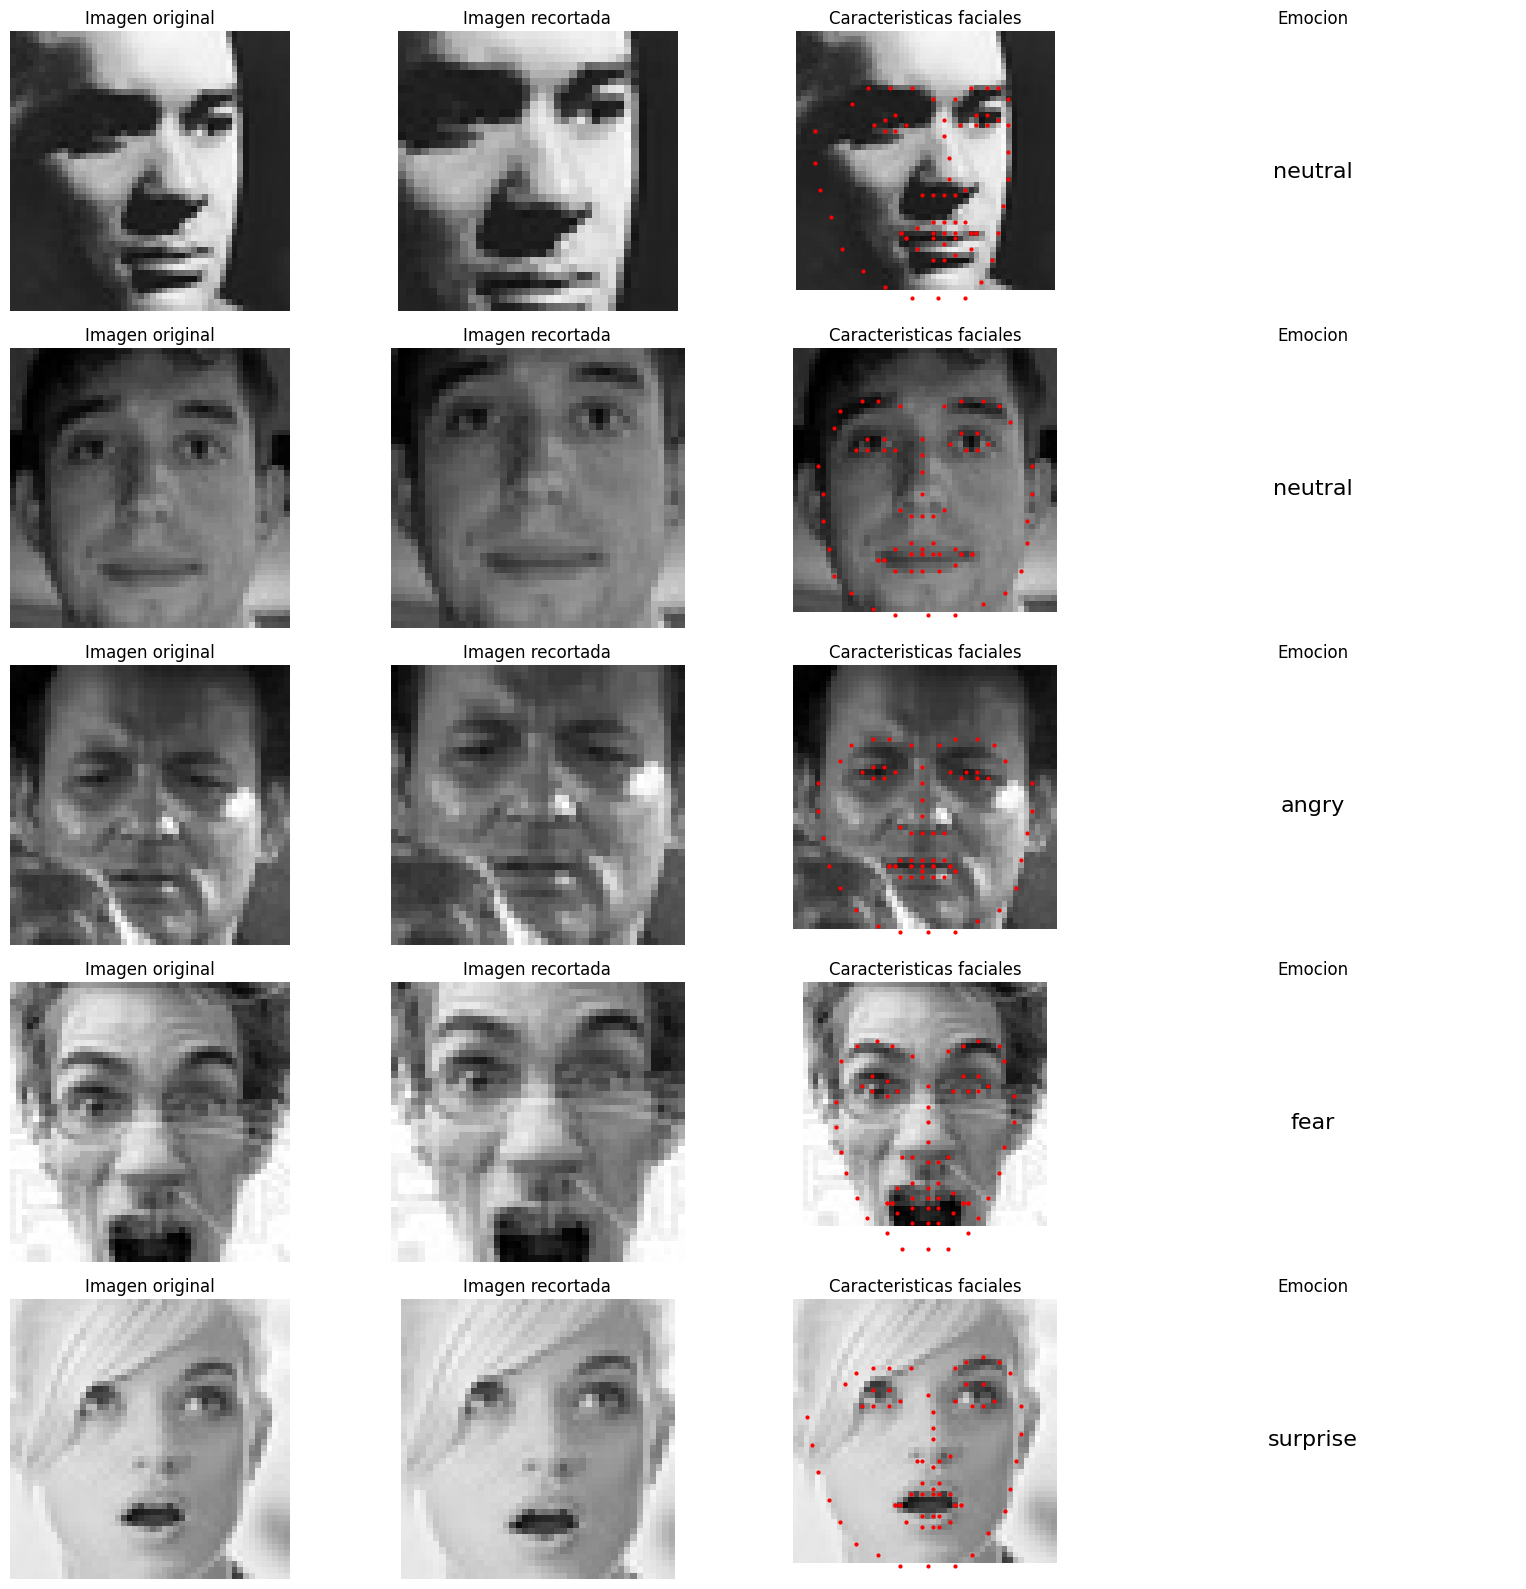

In [18]:
import matplotlib.pyplot as plt

df_ejemploHDF = df_HDF.sample(n=5)
columnas_dfHDF = df_HDF.shape[1]

fig, axes = plt.subplots(nrows = len(df_ejemploHDF), ncols=columnas_dfHDF, figsize=(16,16))

for i, (index, row) in enumerate(df_ejemploHDF.iterrows()):
    ax0 = axes[i,0]
    ax0.imshow(row['Imagen'])
    ax0.set_title('Imagen original')
    ax0.axis('off')

    ax1 = axes[i,1]
    ax1.imshow(row['Rostro'])
    ax1.set_title('Imagen recortada')
    ax1.axis('off')

    ax2 = axes[i,2]
    ax2.imshow(row['Imagen'])

    for caracteristicas in row['Caracteristicas']:
        ax2.plot(caracteristicas[0], caracteristicas[1], marker= 'o', markersize = 2, color='red')

    ax2.set_title('Caracteristicas faciales')
    ax2.axis('off')

    ax3 = axes[i,3]

    ax3.text(0.5, 0.5, row['Etiqueta'], horizontalalignment= 'center',verticalalignment='center',fontsize=16)
    ax3.set_title('Emocion')
    ax3.axis('off')
plt.tight_layout()
plt.show()
    
    
    